<a href="https://colab.research.google.com/github/ibrasow5/ClientPython/blob/main/predictionvehicule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 172s 126ms/step - loss: 62343690059776.0000 - mae: 67061.3672 - val_loss: 424801457930240.0000 - val_mae: 148599.2656
Epoch 2/5
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 195s 122ms/step - loss: 61310402297856.0000 - mae: 66064.6484 - val_loss: 424796860973056.0000 - val_mae: 150151.0781
Epoch 3/5
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 199s 119ms/step - loss: 51746185412608.0000 - mae: 54756.2383 - val_loss: 424790988947456.0000 - val_mae: 152619.5938
Epoch 4/5
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 170s 127ms/step - loss: 34780741632000.0000 - mae: 46390.0039 - val_loss: 424782701002752.0000 - val_mae: 156644.3594
Epoch 5/5
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 206s 130ms/step - loss: 78161400299520.0000 - mae: 91329.5859 - val_loss: 424775755235328.0000 - val_mae: 159650.2188


✅ Modèle entraîné et sauvegardé avec succès !

🔍 Prédiction des prix et génération des images...



model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)oints%2Fscheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
🚗 2020 Toyota Corolla blue (excellent) - 30000 km
💰 Prix estimé : 22637.57 USD



  0%|          | 0/50 [00:00<?, ?it/s]

🖼️ Image générée et sauvegardée sous Toyota_Corolla_2020.png



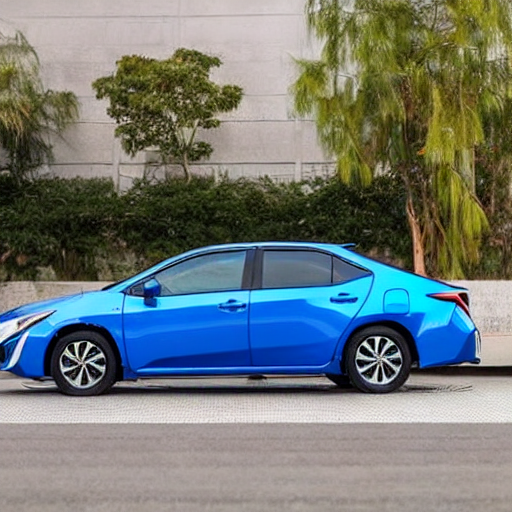

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
layers = keras.layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib  # Sauvegarde et rechargement du préprocesseur
import torch
from diffusers import StableDiffusionPipeline

# Charger les données
df = pd.read_csv("/content/drive/MyDrive/vehicles.csv")

# Sélectionner les colonnes utiles
features = ["year", "manufacturer", "model", "condition", "cylinders", "fuel",
            "odometer", "title_status", "transmission", "drive", "size", "type", "paint_color"]
target = "price"

# Filtrer les données manquantes
df = df[features + [target]].dropna(subset=[target])

num_features = ["year", "odometer"]
df[num_features] = df[num_features].fillna(df[num_features].median())

cat_features = ["manufacturer", "model", "condition", "cylinders", "fuel",
                "title_status", "transmission", "drive", "size", "type", "paint_color"]
df[cat_features] = df[cat_features].fillna("Unknown")

# Séparer les features et la cible
X = df[features]
y = df["price"].values.reshape(-1, 1)

# Pipeline de prétraitement
num_transformer = Pipeline([
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

# Transformation des données
X_transformed = preprocessor.fit_transform(X)

# Sauvegarder le préprocesseur
joblib.dump(preprocessor, "preprocessor.pkl")

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Création du modèle Deep Learning amélioré
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entraînement du modèle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Sauvegarde du modèle
model.save("vehicle_price_model.h5")
print("✅ Modèle entraîné et sauvegardé avec succès !")

# Charger le modèle et le préprocesseur pour la prédiction
model = keras.models.load_model("vehicle_price_model.h5", compile=False)
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mae'])

preprocessor = joblib.load("preprocessor.pkl")

# Exemples de véhicules pour la prédiction
vehicles = [
    {"year": 2020, "manufacturer": "Toyota", "model": "Corolla", "condition": "excellent",
     "cylinders": "4 cylinders", "fuel": "gasoline", "odometer": 30000,
     "title_status": "clean", "transmission": "automatic", "drive": "fwd",
     "size": "compact", "type": "sedan", "paint_color": "blue"}
]

# Fonction pour prédire le prix et générer une image
def predict_and_generate_image(vehicle_list):
    print("\n🔍 Prédiction des prix et génération des images...\n")

    # Charger le modèle de génération d'images
    pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
    pipe.to("cpu")

    for vehicle in vehicle_list:
        # Convertir en DataFrame
        input_data = pd.DataFrame([vehicle], columns=features)

        # Remplir les valeurs manquantes dans l'exemple
        for col in num_features:
            input_data[col] = input_data[col].fillna(df[col].median())

        for col in cat_features:
            input_data[col] = input_data[col].fillna("Unknown")

        # Transformer les données
        input_transformed = preprocessor.transform(input_data)

        # Faire la prédiction
        predicted_price = model.predict(input_transformed)[0][0]

        # Afficher le résultat
        print(f"🚗 {vehicle['year']} {vehicle['manufacturer']} {vehicle['model']} {vehicle['paint_color']} ({vehicle['condition']}) - {vehicle['odometer']} km")
        print(f"💰 Prix estimé : {predicted_price:.2f} USD\n")

        # Générer une image basée sur les caractéristiques du véhicule
        prompt = f"A {vehicle['paint_color']} {vehicle['manufacturer']} {vehicle['model']} from {vehicle['year']}, {vehicle['condition']} condition, {vehicle['type']} type, {vehicle['size']} size."
        image = pipe(prompt).images[0]
        image_path = f"{vehicle['manufacturer']}_{vehicle['model']}_{vehicle['year']}.png".replace(" ", "_")
        image.save(image_path)

        print(f"🖼️ Image générée et sauvegardée sous {image_path}\n")

# Exécuter la prédiction et la génération d'image pour les exemples
predict_and_generate_image(vehicles)


from IPython.display import Image
Image("Toyota_Corolla_2020.png")
